In [20]:
import sys, os
sys.path.append("..")
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from mune.representation import MultimodalBetaVAE, MultimodalBetaVAEConfig

In [2]:
config = MultimodalBetaVAEConfig(
)

In [3]:
model = MultimodalBetaVAE(config=config)

In [4]:
model

MultimodalBetaVAE(
  (encoder_modalities): ModuleDict(
    (vision): VisionEncoder(
      (conv_encoder): Sequential(
        (conv1): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2))
        (relu1): ReLU()
        (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
        (relu2): ReLU()
        (conv3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2))
        (relu3): ReLU()
        (conv4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2))
        (relu4): ReLU()
      )
    )
    (proprio): ProprioEncoder(
      (fc): Linear(in_features=4, out_features=32, bias=True)
    )
  )
  (decoder_modalities): ModuleDict(
    (vision): VisionDecoder(
      (fc_deter_stoch): Linear(in_features=256, out_features=1024, bias=True)
      (convt_decoder): Sequential(
        (convt1): ConvTranspose2d(1024, 128, kernel_size=(5, 5), stride=(2, 2))
        (relu1): ReLU()
        (convt2): ConvTranspose2d(128, 64, kernel_size=(5, 5), stride=(2, 2))
        (relu2): ReLU()
        (convt3

In [5]:
observations = {
    "vision": torch.randn((1, 3, 64, 64)),
    "proprio": torch.randn((1, 4))
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


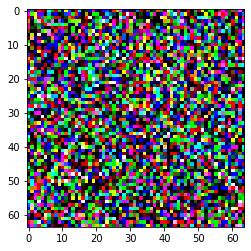

In [13]:
plt.imshow(observations['vision'].squeeze(0).permute(1, 2, 0))

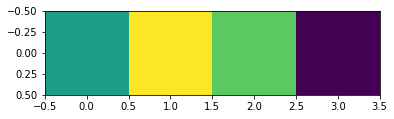

In [14]:
plt.imshow(observations["proprio"])

In [6]:
mu, log_var, z, reco_observations = model(observations)

fusion_state :  torch.Size([1, 256])


In [7]:
mu.size()

torch.Size([1, 128])

In [8]:
log_var.size()

torch.Size([1, 128])

In [9]:
z.size()

torch.Size([1, 128])

In [10]:
model.loss(observations, mu, log_var, reco_observations)

{'loss': tensor(2.0287, grad_fn=<AddBackward0>),
 'reco_loss': tensor(0.9655, grad_fn=<MeanBackward1>),
 'kld_loss': tensor(0.2127, grad_fn=<MeanBackward1>)}